# Интерполационна формула на Нютон. Някои практически въпроси, свързани с интерполацията.

### Задача 1

Да се напише функция _divided_difference(nodes, values)_, където _nodes_ е списък с точки от реалната права, а _values_ -- списък с реални стойности. Функцията да изчислява разделената разлика на функция със стойности _values_ в точките _nodes_.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, expand

def divided_difference(nodes, values):
    if nodes.size==1:
        return values[0]
    return (divided_difference(nodes[1:], values[1:])-divided_difference(nodes[:-1], values[:-1]))/(nodes[-1]-nodes[0])

### Задача 2
Да се напише функция *newton_poly(nodes, values, x)*, която връща стойността на интерполационния полином на Лагранж, с възли _nodes_ и съответни стойности _values_ в т. _x_.

In [94]:
def newton_poly(nodes, values, x):
    sum = divided_difference(nodes[:1], values[:1])

    for k in range (1, nodes.size):
        subsum = 0
        subsum+=divided_difference(nodes[:k+1], values[:k+1])
        for i in range (k):
            subsum*=(x-nodes[i])
        sum+=subsum

    return sum

nodes = np.array([0, 1, 4])
values = np.array([2,3,48])

print(newton_poly(nodes, values, 3))

26.0


In [95]:
x = Symbol('x')
# print(newton_poly(nodes, values, x))
print(expand(newton_poly(nodes, values, x)))

3.5*x**2 - 2.5*x + 2


### Задача 3
В таблицата са дадени данни за населението на САЩ в периода 1920-1990. Да се построи
полином от седма степен, интерполиращ таблицата. Да се даде приближение на населението
през 1952, 1974, 2000 година и да се сравни с действителните стойности --
съответно 157 млн., 214 млн., 281.42 млн.


| Година| 1920 | 1930 | 1940 | 1950 | 1960 | 1970 | 1980 | 1990 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Население | 106.46 | 123.08 | 132.12 | 152.27 | 180.67 | 205.05 | 227.23 | 249.46 |


In [96]:
nodes = np.array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990])
values = np.array([106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46])
print(newton_poly(nodes, values, 1952))
print(newton_poly(nodes, values, 1974))
print(newton_poly(nodes, values, 2000))


157.72802626559996
213.5105312768
175.08000000000214


### Задача 4

Дадена е функцията на Рунге $ f(x)=\dfrac{1}{1+25x^2}$. Да се приближи $ f(x) $ в интервала $x \in [-1,1],$ като се използват интерполационни полиноми от степени 10 и 4 с равноотдалечени възли. 
Да се построят графиките на всеки от полиномите, заедно с графиката на функцията в една координатна система, както и графиките на абсолютната грешка по модул в двата случая.


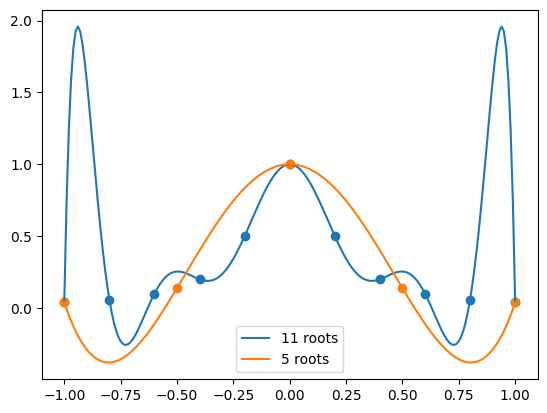

In [97]:
def runge(x):
    return 1/(1+25*(x**2))

x_axis1 = np.linspace(-1, 1, 11)
y_axis1 = runge(x_axis1)
x_axis2 = np.linspace(-1, 1, 5)
y_axis2 = runge(x_axis2)

x = np.linspace(-1, 1, 200)

plt.scatter(x_axis1, y_axis1)
plt.scatter(x_axis2, y_axis2)
plt.plot(x, newton_poly(np.array(x_axis1), np.array(y_axis1), x), label = "11 roots")
plt.plot(x, newton_poly(np.array(x_axis2), np.array(y_axis2), x), label = "5 roots")
plt.legend()

### Задача 5

Известно е (вж. лекции), че най-добрите възли за интерполация в интервала $[-1,1]$ са т.нар. Чебишови възли, които се задават по формулата:

$\xi_k = \cos \left( \dfrac{2k-1}{2n} \pi \right), k=1,\dots,n$


Да се построи интерполационен полином от 10-та степен за функцията на Рунге, като за целта се използват съответните Чебишови възли в интервала $[-1,1]$. Да се построи графика на абсолютната грешка.

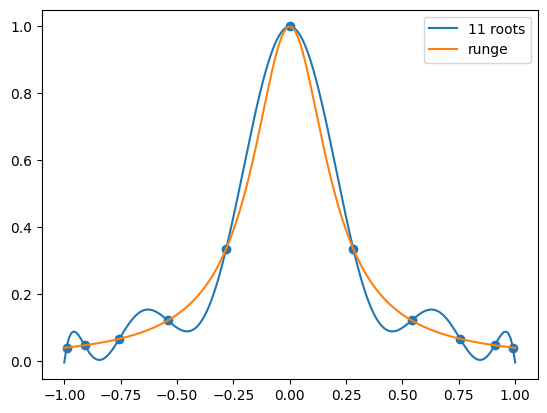

In [98]:
def chebishov(n):
    vuzli = np.array([])
    for k in range (1, n+1):
        el = np.cos(((2*k-1)/(2*n))*np.pi)
        vuzli = np.append(vuzli, el)
    return vuzli

def abserr(value, vuzli, stoinosti):
    return abs(runge(value)-newton_poly(np.array(vuzli), np.array(stoinosti), value))

vuzli = chebishov(11)
stoinosti = runge(vuzli)
x_axis= np.linspace(-1, 1, 200)
y_axis = newton_poly(vuzli, np.array(stoinosti),x_axis)
y_axis2 = abserr(x_axis, vuzli, stoinosti)
plt.scatter(vuzli, stoinosti)
plt.plot(x_axis, y_axis, label = "11 roots")
plt.plot(x_axis, runge(x_axis),label ="runge")
plt.legend()

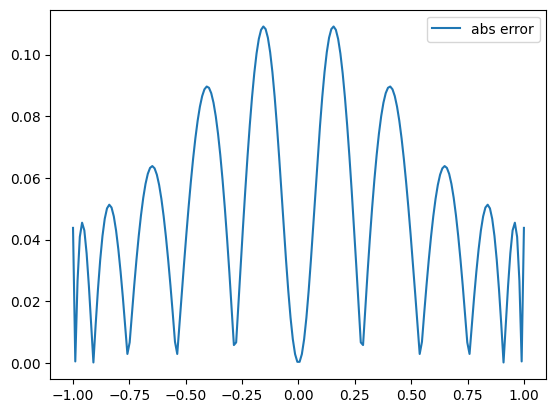

In [99]:
plt.plot(x_axis, y_axis2, label = "abs error")
plt.legend()

### Задача 6

Проведени са експерименти за определяне бързодействието на един алгоритъм за сортиране в зависимост от броя входни елементи. Резултатите са представени в следната таблица:


| Брой елементи (x1000) | 10 | 20 | 50 | 100 | 150 | 200 | 250 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Време (сек.) | 0.163928 | 0.53282 | 3.00007 | 11.2078 | 26.7487 | 47.3297 | 76.8061 |

Да се определи приблизително колко елемента могат да се сортират за 30 сек.